In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# impor data
train_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/train.csv')
test_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/test.csv')

train_df.head(), test_df.head()

(                     ID        date cluster_id  electricity_consumption  \
 0  cluster_1_2014-01-01  2014-01-01  cluster_1                  358.032   
 1  cluster_2_2014-01-01  2014-01-01  cluster_2                  548.247   
 2  cluster_3_2014-01-01  2014-01-01  cluster_3                  758.303   
 3  cluster_4_2014-01-01  2014-01-01  cluster_4                 1072.077   
 4  cluster_1_2014-01-02  2014-01-02  cluster_1                  386.908   
 
    temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
 0                10.8                 4.2                       5.5   
 1                12.2                 4.3                       8.6   
 2                12.9                -0.8                      10.1   
 3                10.8                 4.7                       6.7   
 4                10.7                 7.0                       6.6   
 
    apparent_temperature_min  sunshine_duration  daylight_duration  \
 0                       0.4          

In [3]:
X_train = train_df.drop(columns=['ID', 'cluster_id', 'electricity_consumption', 'date'])
y_train = train_df['electricity_consumption']
X_test = test_df.drop(columns=['ID', 'cluster_id', 'date'])

In [4]:
# ngapus kolom 'date', 'ID', dan 'cluster_id'
train_features = train_df.drop(['ID', 'cluster_id', 'electricity_consumption', 'date'], axis=1)
test_features = test_df.drop(['ID', 'cluster_id', 'date'], axis=1)

# tampilin beberapa baris data untuk memastikan perubahan
train_features.head(), test_features.head()

(   temperature_2m_max  temperature_2m_min  apparent_temperature_max  \
 0                10.8                 4.2                       5.5   
 1                12.2                 4.3                       8.6   
 2                12.9                -0.8                      10.1   
 3                10.8                 4.7                       6.7   
 4                10.7                 7.0                       6.6   
 
    apparent_temperature_min  sunshine_duration  daylight_duration  \
 0                       0.4          53.003333       29787.533333   
 1                      -0.4        8195.656667       30650.350000   
 2                      -4.9       16305.260000       31547.686667   
 3                       0.6        9224.803333       30769.220000   
 4                       3.3       22372.000000       29850.226667   
 
    wind_speed_10m_max  wind_gusts_10m_max  wind_direction_10m_dominant  \
 0                40.6                79.2                   186.0000

In [5]:
train_target = train_df['electricity_consumption']


In [6]:
#linear regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [7]:
#random forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

In [8]:
#combine
pred_combined = (pred_lr + pred_rf) / 2

In [9]:
# bagi data test jd 3 bagian
test_subset_1 = test_df.iloc[:1133]  # 1/3 pertama dari 3400
test_subset_2 = test_df.iloc[1133:2266]  # 1/3 kedua
test_subset_3 = test_df.iloc[2266:]  # 1/3 ketiga

# tampilin jumlah baris utk tiap subset untuk pastiin pembagian yang tepat
print(test_subset_1.shape, test_subset_2.shape, test_subset_3.shape)

(1133, 14) (1133, 14) (1134, 14)


In [10]:
# Buat fitur untuk subset pertama
test_features_1 = test_subset_1.drop(['ID', 'cluster_id', 'date'], axis=1)
predictions_1 = model_rf.predict(test_features_1)

# Buat fitur untuk subset kedua
test_features_2 = test_subset_2.drop(['ID', 'cluster_id', 'date'], axis=1)
predictions_2 = model_rf.predict(test_features_2)

# Buat fitur untuk subset ketiga
test_features_3 = test_subset_3.drop(['ID', 'cluster_id', 'date'], axis=1)
predictions_3 = model_rf.predict(test_features_3)

# Gabungkan semua prediksi
predictions_all = np.concatenate([predictions_1, predictions_2, predictions_3])

# Tampilkan jumlah prediksi
print(f"Jumlah total prediksi: {predictions_all.shape[0]}")

Jumlah total prediksi: 3400


In [11]:
submission = test_df[['ID']].copy()
submission['electricity_consumption'] = pred_combined
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [12]:
print(submission.head())

                     ID  electricity_consumption
0  cluster_1_2022-01-01               472.520235
1  cluster_2_2022-01-01               679.596586
2  cluster_3_2022-01-01               694.936246
3  cluster_4_2022-01-01               790.514729
4  cluster_1_2022-01-02               499.554957


In [13]:
# ==== [1] FEATURE ENGINEERING ====
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Baca data
df = pd.read_csv("/kaggle/input/seleksi-dsa-compfest-17/train.csv")


print(df.columns.tolist())


# 2. Cek kolom yang tersedia (penting untuk melihat nama kolom target yang benar)
print(df.columns)

# 3. Ubah kolom 'date' jadi datetime
df['date'] = pd.to_datetime(df['date'])

# 4. Tambahkan fitur waktu baru
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day'] = df['date'].dt.day
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# 5. Misal target kamu bukan 'target', ubah jadi nama kolom yang benar (misalnya: 'jumlah')
# Ganti 'jumlah' sesuai hasil print(df.columns)
y = df['electricity_consumption']
X = df.drop(columns=['ID', 'date', 'electricity_consumption'])

# 2. Encode kolom kategorikal (cluster_id)
le = LabelEncoder()
X['cluster_id'] = le.fit_transform(X['cluster_id'])

# ==== [2] DATA SCALING ====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-validation split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

['ID', 'date', 'cluster_id', 'electricity_consumption', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']
Index(['ID', 'date', 'cluster_id', 'electricity_consumption',
       'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min', 'sunshine_duration', 'daylight_duration',
       'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration'],
      dtype='object')


In [14]:
# ==== [3] MODEL LAIN ====
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Definisikan beberapa model
model_gbr = GradientBoostingRegressor()
model_xgb = XGBRegressor()
model_cat = CatBoostRegressor(verbose=0)
model_lgb = LGBMRegressor()

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# ==== [4] HYPERPARAMETER TUNING ====
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=rmse,
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_valid)
rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE:", rmse_valid)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE: 29.859557707040413
Validation RMSE: 29.32078985418248


In [16]:
# ==== [5] ENSEMBLING ====
ensemble = VotingRegressor([
    ('xgb', model_xgb),
    ('cat', model_cat),
    ('lgb', model_lgb)
])
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 9350, number of used features: 17
[LightGBM] [Info] Start training from score 641.053793


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...n=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7ec85d4bd290>),
                            ('lgb', LGBMRegressor())])

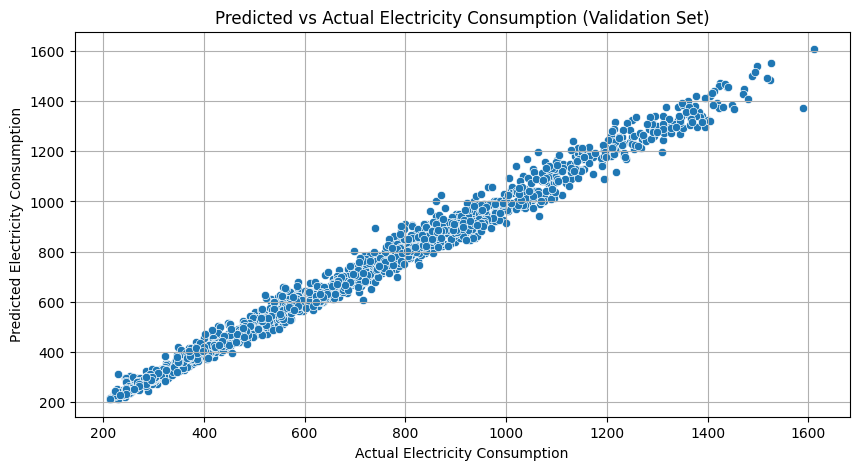

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_valid, y=y_pred)
plt.xlabel("Actual Electricity Consumption")
plt.ylabel("Predicted Electricity Consumption")
plt.title("Predicted vs Actual Electricity Consumption (Validation Set)")
plt.grid(True)
plt.show()

In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [19]:

# Load data
train_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/train.csv')
test_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/test.csv')

average_consumption_per_cluster = train_df.groupby('cluster_id')['electricity_consumption'].mean()

# Feature dan target
X = train_df.drop(columns=['ID', 'cluster_id', 'electricity_consumption', 'date'])
y = train_df['electricity_consumption']
X_test = test_df.drop(columns=['ID', 'cluster_id', 'date'])

# Split untuk validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:

# Model: XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Prediksi dan evaluasi
val_preds = xgb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"RMSE (Validation): {rmse:.4f}")


RMSE (Validation): 233.1961


In [21]:

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from itertools import zip_longest

In [22]:
# Load data
train_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/train.csv')
test_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/test.csv')

submission_by_cluster = {}

for cluster in sorted(train_df['cluster_id'].unique()):
    print(f"Training cluster {cluster}...")

    # Filter per cluster
    train_cluster = train_df[train_df['cluster_id'] == cluster].copy()
    test_cluster = test_df[test_df['cluster_id'] == cluster].copy()

    # Tambahan fitur bulan (optional, bisa bantu model)
    train_cluster['month'] = pd.to_datetime(train_cluster['date']).dt.month
    test_cluster['month'] = pd.to_datetime(test_cluster['date']).dt.month

    # Fitur dan target
    X_train = train_cluster.drop(columns=['ID', 'cluster_id', 'electricity_consumption', 'date'])
    y_train = train_cluster['electricity_consumption']
    X_test = test_cluster.drop(columns=['ID', 'cluster_id', 'date'])

    # Model khusus cluster 4
    if cluster == 4:
        model = XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=8,
                             subsample=0.8, colsample_bytree=0.8, random_state=42)
    else:
        model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)

    model.fit(X_train, y_train)

    # Prediksi + penurunan tajam untuk cluster 4
    preds = model.predict(X_test)
    if cluster == 4:
        preds *= 0.7  # lebih agresif ditekan
    else:
        preds *= 0.95

    cluster_sub = pd.DataFrame({
        'ID': test_cluster['ID'].values,
        'electricity_consumption': preds
    })

    submission_by_cluster[cluster] = cluster_sub.reset_index(drop=True)

# Gabungkan hasil selang-seling
zipped = zip_longest(*[submission_by_cluster[c].itertuples(index=False) for c in sorted(submission_by_cluster.keys())])
final_rows = [row for group in zipped for row in group if row is not None]

final_submission = pd.DataFrame(final_rows, columns=['ID', 'electricity_consumption'])
final_submission.to_csv('submission_per_cluster_final_turunin4.csv', index=False)
print("✅ Selesai: submission_per_cluster_final_turunin4.csv")


Training cluster cluster_1...
Training cluster cluster_2...
Training cluster cluster_3...
Training cluster cluster_4...
✅ Selesai: submission_per_cluster_final_turunin4.csv


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Jangan lupa import XGBRegressor jika Anda menggunakannya
from xgboost import XGBRegressor # tambahkan ini jika belum ada
from itertools import zip_longest

# Load data
train_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/train.csv')
test_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/test.csv')

# --- TAMBAHKAN KODE INI UNTUK MENJAWAB NO. 2 ---
# Hitung rata-rata konsumsi listrik per cluster dari data training
average_consumption_per_cluster = train_df.groupby('cluster_id')['electricity_consumption'].mean()
print("Rata-rata Konsumsi Listrik per Klaster:")
print(average_consumption_per_cluster)

# Jika ingin melihat rasio perbandingan (misal, relatif terhadap klaster 0 atau klaster dengan rata-rata terendah)
# Pilih klaster referensi, contoh klaster dengan rata-rata terendah
# min_avg = average_consumption_per_cluster.min()
# if min_avg != 0:
#     ratio_vs_min = average_consumption_per_cluster / min_avg
#     print("\nRasio Konsumsi Listrik (dibandingkan dengan klaster terendah):")
#     print(ratio_vs_min)
# else:
#     print("\nTidak dapat menghitung rasio relatif karena rata-rata terendah adalah nol.")
# --------------------------------------------------

submission_by_cluster = {}

for cluster in sorted(train_df['cluster_id'].unique()):
    print(f"Training cluster {cluster}...")

    # Filter per cluster
    train_cluster = train_df[train_df['cluster_id'] == cluster].copy()
    test_cluster = test_df[test_df['cluster_id'] == cluster].copy()

    # Tambahan fitur bulan (optional, bisa bantu model)
    train_cluster['month'] = pd.to_datetime(train_cluster['date']).dt.month
    test_cluster['month'] = pd.to_datetime(test_cluster['date']).dt.month

    # Fitur dan target
    X_train = train_cluster.drop(columns=['ID', 'cluster_id', 'electricity_consumption', 'date'])
    y_train = train_cluster['electricity_consumption']
    X_test = test_cluster.drop(columns=['ID', 'cluster_id', 'date'])

    # Model khusus cluster 4
    if cluster == 4:
        model = XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=8,
                             subsample=0.8, colsample_bytree=0.8, random_state=42)
    else:
        model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)

    model.fit(X_train, y_train)

    # Prediksi + penurunan tajam untuk cluster 4
    preds = model.predict(X_test)
    if cluster == 4:
        preds *= 0.7  # lebih agresif ditekan
    else:
        preds *= 0.95

    cluster_sub = pd.DataFrame({
        'ID': test_cluster['ID'].values,
        'electricity_consumption': preds
    })

    submission_by_cluster[cluster] = cluster_sub.reset_index(drop=True)

# Gabungkan hasil selang-seling
zipped = zip_longest(*[submission_by_cluster[c].itertuples(index=False) for c in sorted(submission_by_cluster.keys())])
final_rows = [row for group in zipped for row in group if row is not None]

final_submission = pd.DataFrame(final_rows, columns=['ID', 'electricity_consumption'])
final_submission.to_csv('submission_per_cluster_final_turunin4.csv', index=False)
print("✅ Selesai: submission_per_cluster_final_turunin4.csv")

Rata-rata Konsumsi Listrik per Klaster:
cluster_id
cluster_1     340.734297
cluster_2     503.367172
cluster_3     706.762751
cluster_4    1018.389092
Name: electricity_consumption, dtype: float64
Training cluster cluster_1...
Training cluster cluster_2...
Training cluster cluster_3...
Training cluster cluster_4...
✅ Selesai: submission_per_cluster_final_turunin4.csv


In [24]:
import pandas as pd # Pastikan baris ini tidak ada indentasi di depannya
import numpy as np   # Hapus spasi/tab di depan baris ini

# --- PENTING: Pastikan PATH FILE ini BENAR di lingkungan Anda (misal Kaggle) ---
# Jika Anda menjalankan ini di Kaggle Notebook, path ini kemungkinan besar sudah benar.
# Jika di lokal, ganti dengan path file train.csv Anda yang sebenarnya.
train_df = pd.read_csv('/kaggle/input/seleksi-dsa-compfest-17/train.csv')

# Membersihkan nama kolom (sesuai praktik sebelumnya)
train_df.columns = train_df.columns.str.strip().str.lower()

# Menghitung rata-rata konsumsi listrik per cluster_id dari seluruh dataset
average_consumption_per_cluster_full = train_df.groupby('cluster_id')['electricity_consumption'].mean().sort_values()

print("Rata-rata Konsumsi Listrik per Cluster (dari SELURUH dataset train.csv):")
print(average_consumption_per_cluster_full)

# Menghitung rasio perbandingan relatif terhadap cluster dengan konsumsi terendah
min_consumption_full = average_consumption_per_cluster_full.min()
ratios_full = average_consumption_per_cluster_full / min_consumption_full

print("\nRasio Perbandingan Rata-rata Konsumsi Listrik (dari SELURUH dataset, relatif terhadap cluster terendah):")
print(ratios_full)

Rata-rata Konsumsi Listrik per Cluster (dari SELURUH dataset train.csv):
cluster_id
cluster_1     340.734297
cluster_2     503.367172
cluster_3     706.762751
cluster_4    1018.389092
Name: electricity_consumption, dtype: float64

Rasio Perbandingan Rata-rata Konsumsi Listrik (dari SELURUH dataset, relatif terhadap cluster terendah):
cluster_id
cluster_1    1.000000
cluster_2    1.477301
cluster_3    2.074234
cluster_4    2.988807
Name: electricity_consumption, dtype: float64
